## Imports

In [52]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [53]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

In [54]:
from importlib import reload as rl
from atos import cessoes
import numpy as np
rl(cessoes);

# Dataframe Cessoes

In [61]:
%%time
files = helper.get_files_path("../data/txt/2019/")

def extract_multiple(files, type, txt_out=False, txt_path="./results"):
    res = []
    res_acts = []
    for file in files:
        res_obj = cessoes.Cessoes(file)
        res_df = res_obj.data_frame
        res_txt = res_obj.acts_str
        if not res_df.empty:
            res.append(res_df)
            if txt_out:
                helper._build_act_txt(res_txt, type, txt_path)
                res_acts.extend(res_txt)
    res_final = pd.concat([pd.DataFrame(df) for df in res],
                            ignore_index=True)
    return res_final, np.array(res_acts)

CPU times: user 4.83 ms, sys: 41 µs, total: 4.87 ms
Wall time: 3.89 ms


In [62]:
%%time

rets_final, acts_final = extract_multiple(files, "cessoes", True, "../results/")
# rets_final

CPU times: user 10.4 s, sys: 388 ms, total: 10.8 s
Wall time: 10.8 s


# Análise

In [50]:
def attribute_stats(name, rets_final):
    presence_name = rets_final[name].value_counts()
    total = rets_final.count()
    labels = ["Com " + name, "Sem " + name]
    size = [total[name] - presence_name[0], presence_name[0]]
    return size, labels

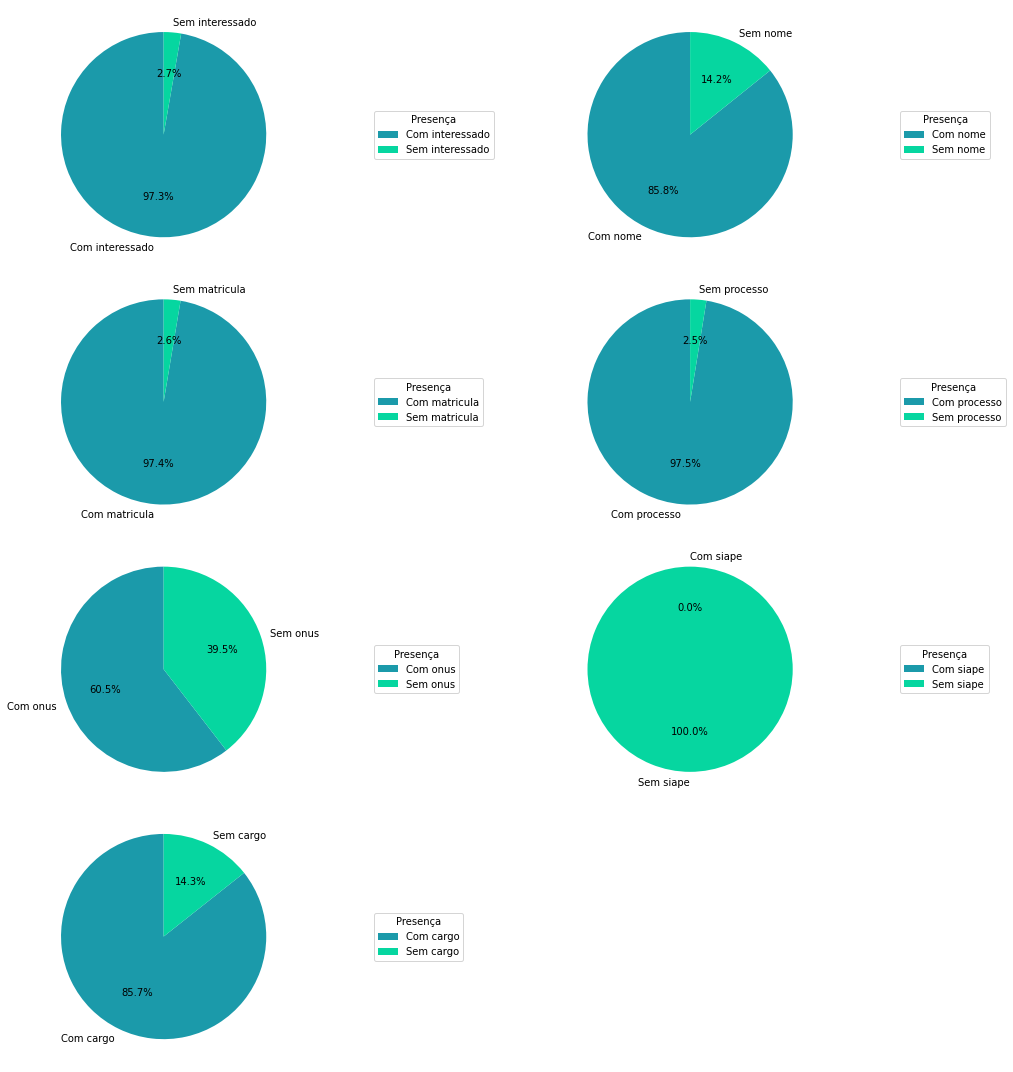

In [51]:

cor = ['#1b9aaa', '#06d6a0']
numb_attr = rets_final.shape[1]-1
grid_square = math.ceil(numb_attr/2)

grid_square = int(grid_square)
_, ax = plt.subplots(grid_square, 2, figsize=(15,15))
names = rets_final.columns[1:]
for i in range(grid_square*2):
    if i < numb_attr:
        size, labels = attribute_stats(names[i], rets_final)
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
    else:
        ax[math.floor(i/2), i%2].axis('off')

plt.tight_layout()
plt.show()